# Introduction to `FlowStruct`
The `FlowStruct` is the core class in the `flowpy2` package. This integrates a series of important functionality
1. Coordinate information stored in a `Coordstruct`
2. Storage of associated data arrays from 
3. Output to `pyvista.StructuredGrid` for compatibility with VTK
4. Can be stored in the `.h5` file format
5. Output to netCDF's `.nc` file format for integration with Paraview, with expansion to `.xdmf` and possibly `.bp4`/`.bp5` file formats in the end
6. Processing of arrays such as gradients with future expansion to interpolation and integration. This could also be expanded to vector and matrix operations with the yet to be implemented `groups` module.
7. In principle compatibility with `cupy`, but this is yet to be properly implemented

In [1]:
import flowpy2 as fp2
import numpy as np

# First CoordStruct
coord_dict = {'x':np.arange(100, dtype='f8'),
              'y':np.arange(200, dtype='f8'),
              'z':np.arange(150, dtype='f8')}

cs = fp2.CoordStruct('Cartesian',
                     coord_dict)

# construct arbitrary data array
data = cs['x'][:,None,None] + cs['y'][:,None] + cs['z']
data1 = np.stack([data, data*2, data*3])

# create flow struct
fs = fp2.FlowStructND(cs, data1, comps=['u', 'v', 'w'])
print(fs)

FlowStructND(Cartesian, comps=['u', 'v', 'w'], times=None, shape=(100, 200, 150))


In [2]:
# Access coordinate data
fs.coords

CoordStruct(Cartesian, index=['x', 'y', 'z'])

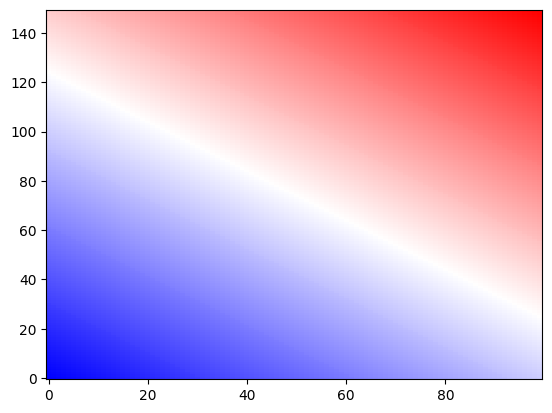

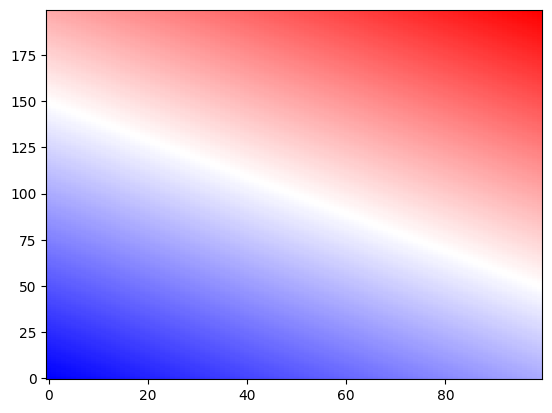

In [3]:
# Plot planes

ax = fs.pcolormesh('u', 'xz', 100, cmap='bwr')
ax = fs.pcolormesh('u', 'xy', 75, cmap='bwr')


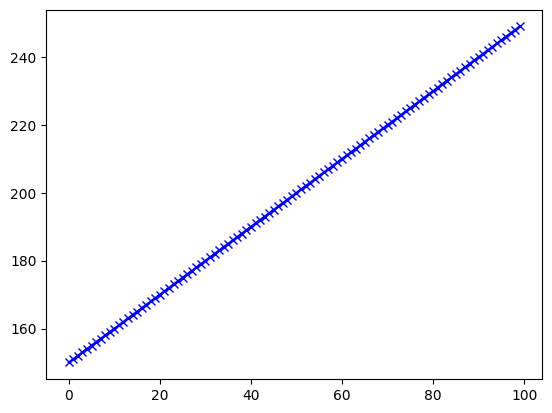

In [4]:
ax = fs.plot_line('u', 'x', {'y': 50,'z':100}, c='b')

In [5]:
# Get data by indexing
u = fs['u']
v = fs['v']
w = fs['w']

# get data using `get` method 
# and reduce domain size in x direction

u1 = fs.get(comp='u',
            x=slice(50))

#or 

u2 = fs.slice[:50]['u']

np.array_equal(u1,u2)

True

In [6]:
# compute first derivative
d = fs.first_derivative('u', axis='x')

/home/mfalcone/data/SOFTWARE/miniconda3/envs/flowpy2/lib/python3.11/site-packages/pyvista/jupyter/notebook.py:34: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


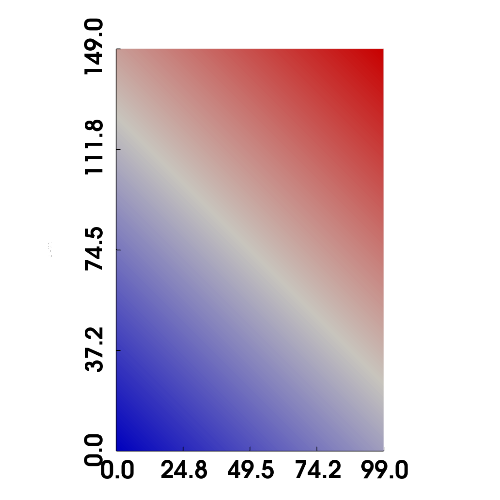

: 

In [7]:
v = fs.to_vtk(comps='u')
import pyvista as pv

p = pv.Plotter(window_size=(500,500))
p.add_mesh(v.slice('y',origin=(0,100,0)),
           cmap='bwr',
           show_scalar_bar=False)

p.view_xz()
p.show_bounds()
p.show()